In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
import os
try:
	os.chdir('C:\\Users\\Administrator\\Desktop\\ml_ipynb\\ex6')
	print(os.getcwd())
except:
    print(os.getcwd()+" not changed!!!")



C:\Users\Administrator\Desktop\ml_ipynb\ex6


 # ex6 线性svm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import loadmat
import scipy.optimize as opt
import sys
import sklearn.svm
sys.path.append('..')
sys.path
from helper import formulas




 # 1 首先加载数据

In [3]:
data = loadmat('data/ex6data1.mat')
X = data['X']
y = data['y'].ravel()
print(X.shape)
print(y.shape)


(51, 2)
(51,)


 画出散点图看看

Text(0, 0.5, 'X2')

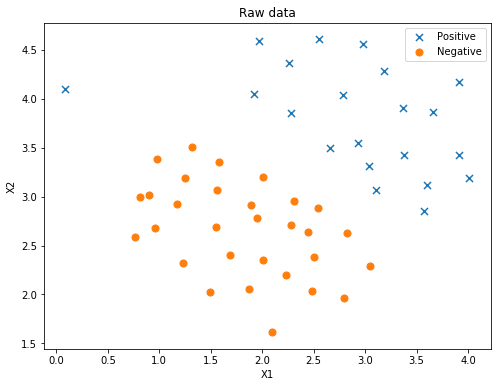

In [4]:
pos = np.where(y==1)
neg = np.where(y==0)
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X[pos,0], X[pos,1], s= 50,marker='x', label='Positive')
ax.scatter(X[neg,0], X[neg,1], s= 50,marker='o', label='Negative')
ax.legend()
ax.set_title('Raw data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')



 # 2 开始训练
 可以看到,这是一个明显的线性边界,我们首先尝试C=1的情况

In [5]:
svc1 = sklearn.svm.LinearSVC(C=1, loss='hinge')
svc1.fit(X, y)
svc1.score(X, y)


D:\programSoftware\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

In [6]:
# 上面的准确度是98%,我们划出一下分类后的图



Text(0.5, 1.0, 'SVM (C=1) Decision Confidence')

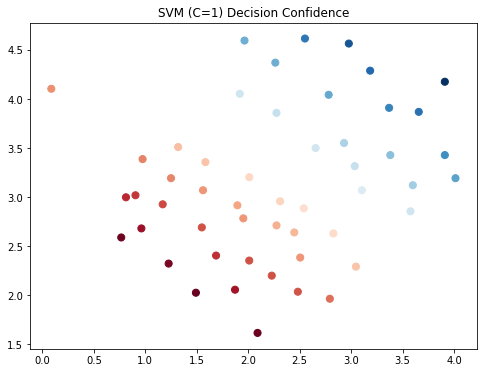

In [6]:
svmConfidence = svc1.decision_function(X)
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X[:,0], X[:,1], s=50,
	 c=svmConfidence, cmap='RdBu')
ax.set_title('SVM (C=1) Decision Confidence')




 # 3 尝试不同的C
 C提到相当于正则化程度减小.更容易出现偏差

In [7]:
svc100 = sklearn.svm.LinearSVC(C=100, loss='hinge')
svc100.fit(X, y)
svc100.score(X, y)
# score是94


D:\programSoftware\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9019607843137255

Text(0.5, 1.0, 'SVM (C=100) Decision Confidence')

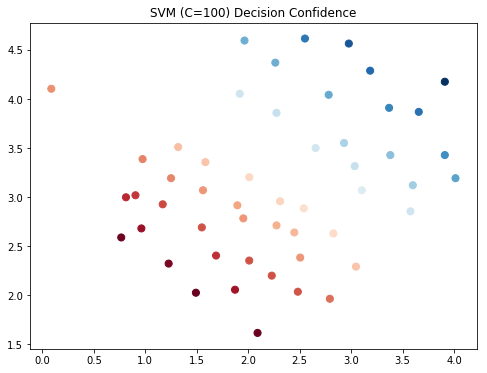

In [8]:
# 画图
svmConfidence2 = svc100.decision_function(X)
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X[:,0], X[:,1], s=50,
	 c=svmConfidence, cmap='RdBu')
ax.set_title('SVM (C=100) Decision Confidence')


 # 4 最后看看100和1 C之间confidence的区别
 注意,y = 1的时候,confidence越大越好
 y = 0的时候,confidence越小越好

In [9]:
tb = pd.DataFrame(X, columns=['X1', 'X2'])
tb['y'] = y
tb['SVM1 Confidence'] = svmConfidence
tb['SVM100 Confidence'] = svmConfidence2


